Advanced Regression
Surprise Housing Case Study
Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company is looking at prospective properties to buy to enter the market.The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

Essentially, the company wants —

Which variables are significant in predicting the price of a house.
How well those variables describe the price of a house.
Step 1: Reading and Understanding the Data¶ Let us first import NumPy and Pandas and read the dataset

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

In [ ]:
surprisehousing = pd.read_csv("train.csv")


In [ ]:
# Check the head of the dataset
surprisehousing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
surprisehousing.shape

(1460, 81)

In [ ]:
surprisehousing.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The total number of rows and columns


In [ ]:
rows = surprisehousing.shape[0]
cols = surprisehousing.shape[1]
  
# displaying the number of rows and columns
print("Rows: " + str(rows))
print("Columns: " + str(cols))

Rows: 1460
Columns: 81


Displaying the data types of variables


In [ ]:
pd.set_option("max_rows", None)
surprisehousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Checking for duplicate data


In [ ]:
dups = surprisehousing.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

surprisehousing[dups]

Number of duplicate rows = 0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
pd.set_option("max_rows", None)
round(100*(surprisehousing.isnull().sum()/len(surprisehousing.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

1.There are 4 columns with > 80% null values. we will be dropping these columns.



In [ ]:
## To drop null columns
surprisehousing.drop(['PoolQC','Fence','MiscFeature','Alley'], axis=1, inplace = True)

In [ ]:
surprisehousing.drop(['SaleCondition'], axis=1, inplace = True)


In [ ]:
## Replacing null values with median value
nan_value = 70
fir_value=4
surprisehousing["LotFrontage"].fillna(nan_value,inplace=True)
surprisehousing["FireplaceQu"].fillna(fir_value,inplace=True)

In [ ]:
## To drop null rows
surprisehousing.dropna(subset = ["BsmtExposure","BsmtFinType2","Electrical","GarageYrBlt","GarageFinish",
                      "GarageQual","GarageCond","MasVnrType","MasVnrArea"], inplace=True)

In [ ]:
cat=[]
num=[]
for i in surprisehousing.columns:
    if surprisehousing[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Mis

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(surprisehousing[num]))   # get the z-score of every value with respect to their columnscolumns
surprisehousing_num = surprisehousing[num][(z < 3).all(axis=1)]    # Select only the rows without a single outlier
surprisehousing_num.shape, surprisehousing[num].shape

((947, 38), (1338, 38))

In [ ]:
## Categorical dataframe
surprisehousing_cat = surprisehousing[cat]
surprisehousing_cat.shape

## Numerical Dataframe
surprisehousing_cat.shape, surprisehousing_num.shape

((1338, 38), (947, 38))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f780bed7690>,
      dtype=object)

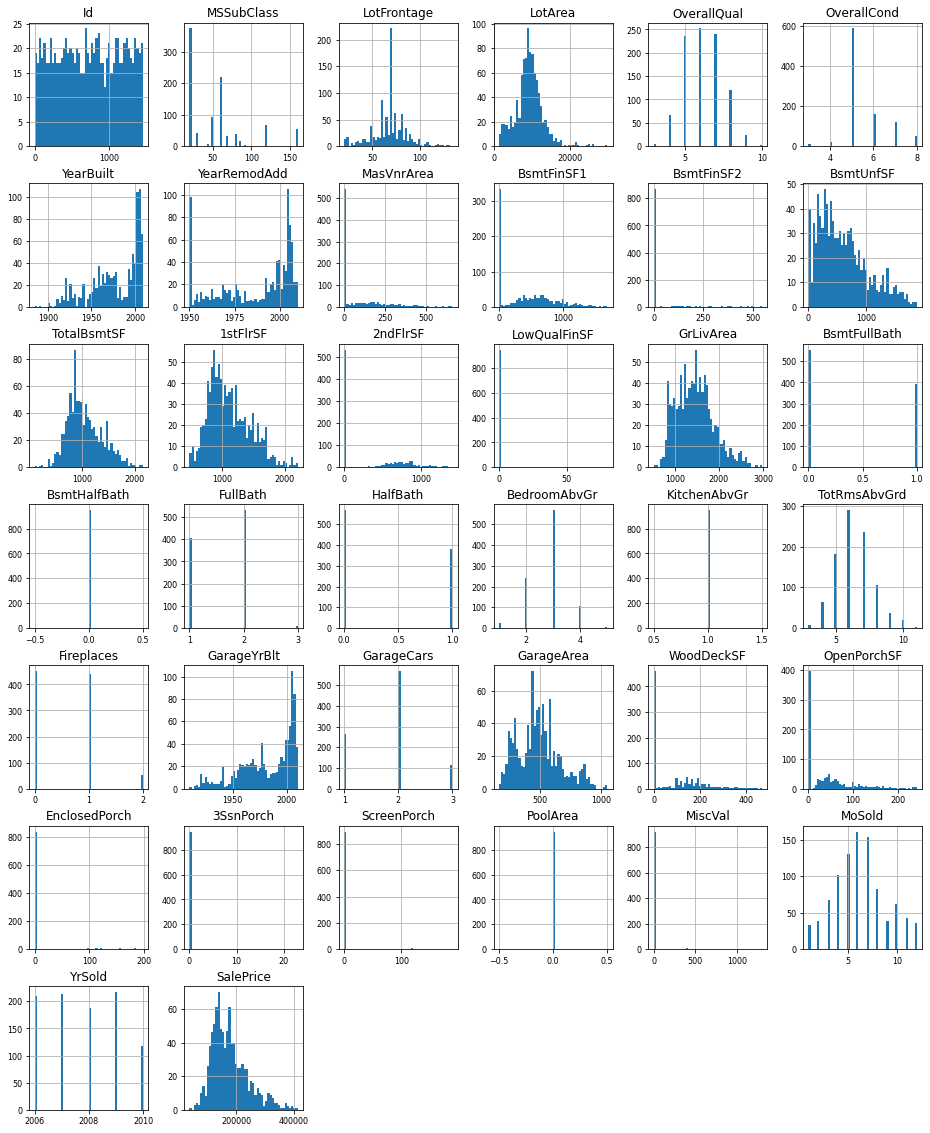

In [ ]:
surprisehousing_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


In [ ]:
# Encoding oridnal column ExterCond unique variable with integer variable
Exter_mapper = {"Ex":5, "Gd":4, "TA":3,"Fa":2,"Po":1}
surprisehousing["ExterCondScale"] = surprisehousing["ExterCond"].replace(Exter_mapper)

In [ ]:
# Encoding oridnal column BsmtQual unique variable with integer variable
BsmtQual_mapper = {"Ex":6, "Gd":5, "TA":4,"Fa":3,"Po":2,"NA":1}
surprisehousing["BsmtQualScale"] = surprisehousing["BsmtQual"].replace(BsmtQual_mapper)

In [ ]:
# Encoding oridnal column BsmtCond unique variable with integer variable
BsmtCond_mapper = {"Ex":6, "Gd":5, "TA":4,"Fa":3,"Po":2,"NA":1}
surprisehousing["BsmtCondScale"] = surprisehousing["BsmtCond"].replace(BsmtCond_mapper)

In [ ]:
# Encoding oridnal column BsmtExposure unique variable with integer variable
BsmtExposure_mapper = {"Gd":5,"Av":4,"Mn":3,"No":2,"NA":1}
surprisehousing["BsmtExposureScale"] = surprisehousing["BsmtExposure"].replace(BsmtExposure_mapper)

In [ ]:
# Encoding oridnal column BsmtFinType1 unique variable with integer variable
BsmtFinType1_mapper={"GLQ":7,"ALQ":6,"BLQ":5,"Rec":4,"LwQ":3,"Unf":2,"NA":1}
surprisehousing["BsmtFinType1Scale"] = surprisehousing["BsmtFinType1"].replace(BsmtFinType1_mapper)

In [ ]:
# Encoding oridnal column BsmtFinType2 unique variable with integer variable
BsmtFinType2_mapper={"GLQ":7,"ALQ":6,"BLQ":5,"Rec":4,"LwQ":3,"Unf":2,"NA":1}
surprisehousing["BsmtFinType2Scale"] = surprisehousing["BsmtFinType2"].replace(BsmtFinType2_mapper)

In [ ]:
# Encoding oridnal column HeatingQC unique variable with integer variable
HeatingQC_mapper={"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1}
surprisehousing["HeatingQCScale"] = surprisehousing["HeatingQC"].replace(HeatingQC_mapper)

In [ ]:
# Encoding oridnal column KitchenQual unique variable with integer variable
KitchenQual_mapper={"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1}
surprisehousing["KitchenQualScale"] = surprisehousing["KitchenQual"].replace(KitchenQual_mapper)

In [ ]:
# Encoding oridnal column FireplaceQu unique variable with integer variable
FireplaceQu_mapper={"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"NA":0}
surprisehousing["FireplaceQuScale"] = surprisehousing["FireplaceQu"].replace(FireplaceQu_mapper)

In [ ]:
# Encoding oridnal column GarageQual unique variable with integer variable
GarageQual_mapper={"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"NA":0}
surprisehousing["GarageQualScale"] = surprisehousing["GarageQual"].replace(GarageQual_mapper)

In [ ]:
# Encoding oridnal column GarageCond unique variable with integer variable
GarageCond_mapper={"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"NA":0}
surprisehousing["GarageCondScale"] = surprisehousing["GarageCond"].replace(GarageCond_mapper)

In [ ]:
CentralAir_mapper={"N":0,"Y":1}
surprisehousing["CentralAirScale"] = surprisehousing["CentralAir"].replace(CentralAir_mapper)

In [ ]:
Utilities_mapper={"AllPub":0,"NoSeWa":1}
surprisehousing["UtilitiesScale"] = surprisehousing["Utilities"].replace(Utilities_mapper)

In [ ]:
# Drop 'Street' as we have created the dummies for it
surprisehousing.drop(['Street'], axis = 1, inplace = True)

In [ ]:
# Drop 'ExterCond' as we have created the dummies for it
surprisehousing.drop(['ExterCond'], axis = 1, inplace = True)
# Drop 'BsmtQual' as we have created the dummies for it
surprisehousing.drop(['BsmtQual'], axis = 1, inplace = True)
# Drop 'BsmtCond' as we have created the dummies for it
surprisehousing.drop(['BsmtCond'], axis = 1, inplace = True)
# Drop 'BsmtExposure' as we have created the dummies for it
surprisehousing.drop(['BsmtExposure'], axis = 1, inplace = True)
# Drop 'BsmtFinType1' as we have created the dummies for it
surprisehousing.drop(['BsmtFinType1'], axis = 1, inplace = True)
# Drop 'BsmtFinType2' as we have created the dummies for it
surprisehousing.drop(['BsmtFinType2'], axis = 1, inplace = True)
# Drop 'HeatingQC' as we have created the dummies for it
surprisehousing.drop(['HeatingQC'], axis = 1, inplace = True)
# Drop 'KitchenQual' as we have created the dummies for it
surprisehousing.drop(['KitchenQual'], axis = 1, inplace = True)
# Drop 'GarageCond' as we have created the dummies for it
surprisehousing.drop(['GarageCond'], axis = 1, inplace = True)
# Drop 'CentralAir' as we have created the dummies for it
surprisehousing.drop(['CentralAir'], axis = 1, inplace = True)
# Drop 'Utilities' as we have created the dummies for it
surprisehousing.drop(['Utilities'], axis = 1, inplace = True)

In [ ]:
# Drop 'GarageQual' as we have created the dummies for it
surprisehousing.drop(['GarageQual'], axis = 1, inplace = True)

In [ ]:
# Drop 'FireplaceQu' as we have created the dummies for it
surprisehousing.drop(['FireplaceQu'], axis = 1, inplace = True)

In [ ]:
# Get the dummy variables for the feature 'weathersit' and season it in a new variable - 'status'
pavedDriveStatus = pd.get_dummies(surprisehousing['PavedDrive'])
pavedDriveStatus.head()

,N,P,Y
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
# Let's drop the first column from status df using 'drop_first = True'
#pavedDriveStatus = pd.get_dummies(surprisehousing['PavedDrive'], drop_first = True)
# Add the results to the original surprisehousing dataframe
surprisehousing = pd.concat([surprisehousing, pavedDriveStatus], axis = 1)
# Drop 'PavedDrive' as we have created the dummies for it
surprisehousing.drop(['PavedDrive'], axis = 1, inplace = True)

In [ ]:
HeatingStatus = pd.get_dummies(surprisehousing['Heating'])
HeatingStatus.head()

,GasA,GasW,Grav,OthW
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
# Let's drop the first column from status df using 'drop_first = True'
#pavedDriveStatus = pd.get_dummies(surprisehousing['PavedDrive'], drop_first = True)
# Add the results to the original surprisehousing dataframe
surprisehousing = pd.concat([surprisehousing, HeatingStatus], axis = 1)
# Drop 'PavedDrive' as we have created the dummies for it
surprisehousing.drop(['Heating'], axis = 1, inplace = True)

In [ ]:
SaleTypeStatus = pd.get_dummies(surprisehousing['SaleType'])
SaleTypeStatus.head()

,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


In [ ]:
# Add the results to the original surprisehousing dataframe
surprisehousing = pd.concat([surprisehousing, SaleTypeStatus], axis = 1)
# Drop 'PavedDrive' as we have created the dummies for it
surprisehousing.drop(['SaleType'], axis = 1, inplace = True)

In [ ]:
LandSlopeStatus = pd.get_dummies(surprisehousing['LandSlope'])
LandSlopeStatus.head()

,Gtl,Mod,Sev
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
# Add the results to the original surprisehousing dataframe
surprisehousing = pd.concat([surprisehousing, LandSlopeStatus], axis = 1)
# Drop 'PavedDrive' as we have created the dummies for it
surprisehousing.drop(['LandSlope'], axis = 1, inplace = True)

In [ ]:
MSZoningStatus = pd.get_dummies(surprisehousing['MSZoning'])
MSZoningStatus.head()

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [ ]:
# Add the results to the original surprisehousing dataframe
surprisehousing = pd.concat([surprisehousing, MSZoningStatus], axis = 1)
# Drop 'PavedDrive' as we have created the dummies for it
surprisehousing.drop(['MSZoning'], axis = 1, inplace = True)

In [ ]:
LotShapeStatus = pd.get_dummies(surprisehousing['LotShape'])
LotShapeStatus.head()

,IR1,IR2,IR3,Reg
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
# Add the results to the original surprisehousing dataframe
surprisehousing = pd.concat([surprisehousing, LotShapeStatus], axis = 1)
# Drop 'PavedDrive' as we have created the dummies for it
surprisehousing.drop(['LotShape'], axis = 1, inplace = True)

In [ ]:
LandContourStatus = pd.get_dummies(surprisehousing['LandContour'])
LandContourStatus.head()

,Bnk,HLS,Low,Lvl
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
# Add the results to the original surprisehousing dataframe
surprisehousing = pd.concat([surprisehousing, LandContourStatus], axis = 1)
# Drop 'PavedDrive' as we have created the dummies for it
surprisehousing.drop(['LandContour'], axis = 1, inplace = True)

In [ ]:
LotConfigStatus = pd.get_dummies(surprisehousing['LotConfig'])
LotConfigStatus.head()


,Corner,CulDSac,FR2,FR3,Inside
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,1,0,0


In [ ]:
# Add the results to the original surprisehousing dataframe
surprisehousing = pd.concat([surprisehousing, LotConfigStatus], axis = 1)
# Drop 'PavedDrive' as we have created the dummies for it
surprisehousing.drop(['LotConfig'], axis = 1, inplace = True)

In [ ]:
cat=[]
num=[]
for i in surprisehousing.columns:
    if surprisehousing[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'Electrical', 'Functional', 'GarageType', 'GarageFinish']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'ExterCondScale', 'BsmtQualScale', 'BsmtCondScale', 'BsmtExposureScale', 'BsmtFinType1Scale', 'BsmtFinType2Scale', 'HeatingQCScale', 'KitchenQualScale', 'FireplaceQuScale', 'GarageQualScale', 'GarageCondScale', 'CentralAirScale', 'UtilitiesScale', 'N', 'P

In [ ]:
surprisehousing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Columns: 104 entries, Id to Inside
dtypes: float64(3), int64(48), object(16), uint8(37)
memory usage: 759.2+ KB


In [ ]:
surprisehousing.drop(columns=cat, inplace=True)

Splitting the Data into Training and Testing Sets¶ As you know, the first basic step for regression is performing a train-test split.



In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(surprisehousing, train_size = 0.7, test_size = 0.3, random_state = 100)

Rescaling the Features As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling Standardisation (mean-0, sigma-1) This time, we will use MinMax scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
sprice=['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','SalePrice']

In [ ]:
scaler = MinMaxScaler()


In [ ]:
num_vars=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'ExterCondScale',
       'BsmtQualScale', 'BsmtCondScale', 'BsmtExposureScale',
       'BsmtFinType1Scale', 'BsmtFinType2Scale', 'HeatingQCScale',
       'KitchenQualScale', 'FireplaceQuScale', 'GarageQualScale',
       'GarageCondScale', 'CentralAirScale', 'UtilitiesScale',
       'N', 'P', 'Y', 'GasA', 'GasW', 'Grav', 'OthW', 'COD', 'CWD', 'Con',
       'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'Gtl', 'Mod', 'Sev',
       'C (all)', 'FV', 'RH', 'RL', 'RM', 'IR1', 'IR2', 'IR3', 'Reg', 'Bnk',
       'HLS', 'Low', 'Lvl', 'Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']

In [ ]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

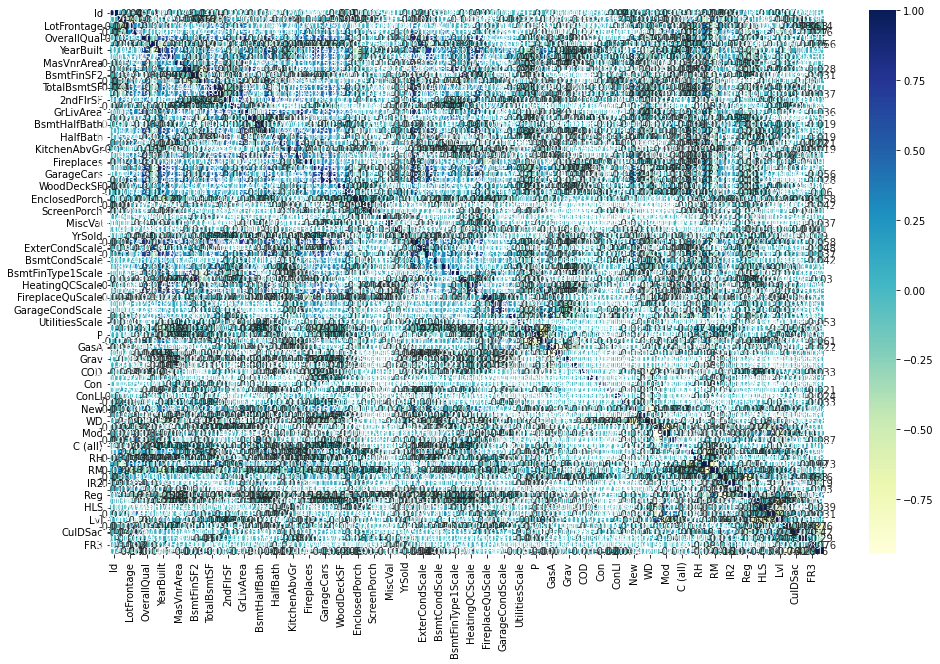

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

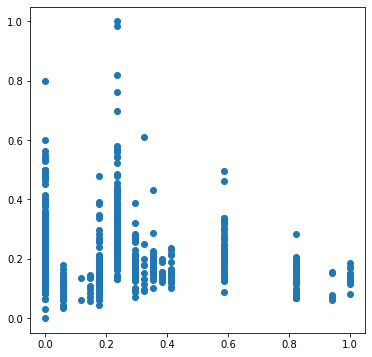

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.MSSubClass, df_train.SalePrice)
plt.show()

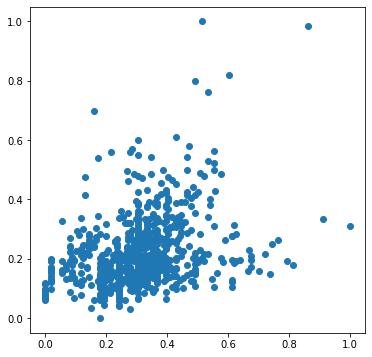

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.LotFrontage, df_train.SalePrice)
plt.show()

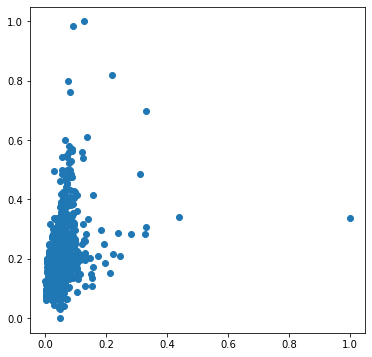

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.LotArea, df_train.SalePrice)
plt.show()

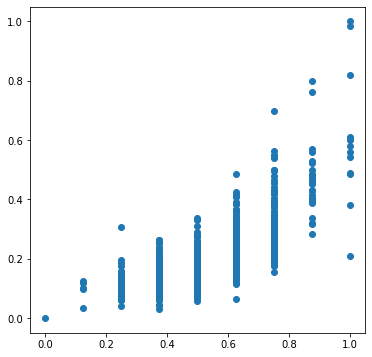

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.OverallQual, df_train.SalePrice)
plt.show()

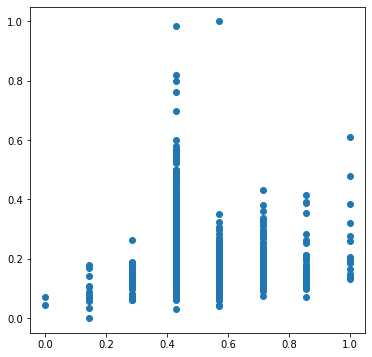

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.OverallCond, df_train.SalePrice)
plt.show()

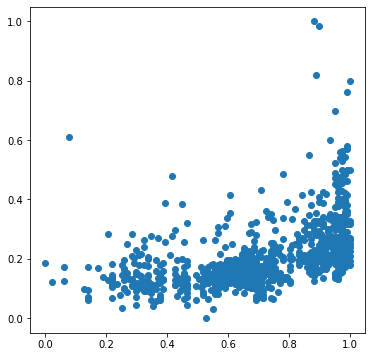

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.YearBuilt, df_train.SalePrice)
plt.show()

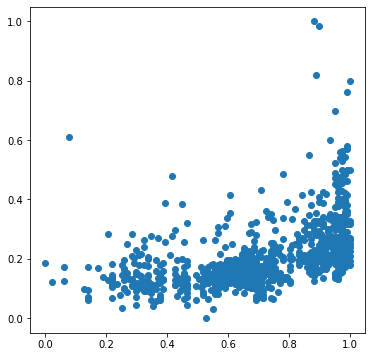

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.YearBuilt, df_train.SalePrice)
plt.show()

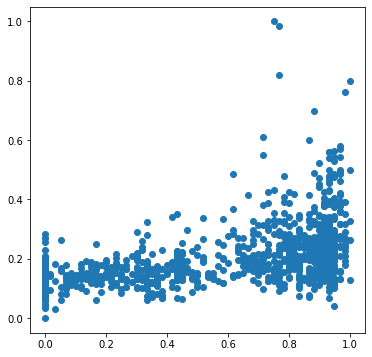

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.YearRemodAdd, df_train.SalePrice)
plt.show()

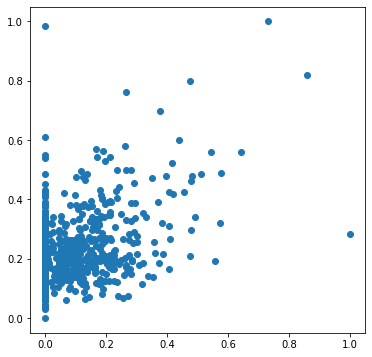

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.MasVnrArea, df_train.SalePrice)
plt.show()

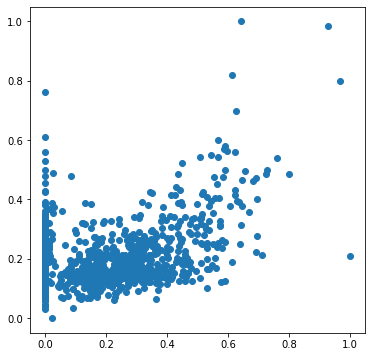

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.BsmtFinSF1, df_train.SalePrice)
plt.show()

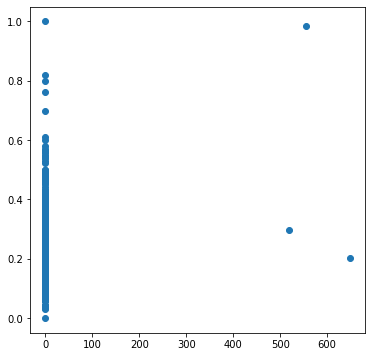

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.PoolArea, df_train.SalePrice)
plt.show()

Dividing into X and Y sets for the model building


In [ ]:
y_train = df_train.pop('SalePrice')
X_train = df_train

Step 5: Building a linear model


In [ ]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['LotFrontage']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
lr.params


const          0.116620
LotFrontage    0.297789
dtype: float64

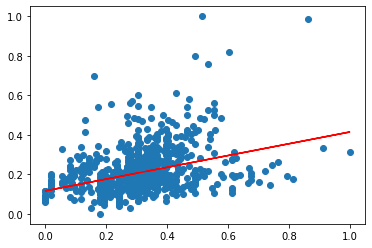

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1],  0.116620 +0.297789*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [ ]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     124.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           3.10e-27
Time:                        02:06:10   Log-Likelihood:                 801.68
No. Observations:                 936   AIC:                            -1599.
Df Residuals:                     934   BIC:                            -1590.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1166      0.009     13.207      

In [ ]:
X_train_lm = X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'ExterCondScale',
       'BsmtQualScale', 'BsmtCondScale', 'BsmtExposureScale',
       'BsmtFinType1Scale', 'BsmtFinType2Scale', 'HeatingQCScale',
       'KitchenQualScale', 'FireplaceQuScale', 'GarageQualScale',
       'GarageCondScale', 'CentralAirScale', 'UtilitiesScale',
       'N', 'P', 'Y', 'GasA', 'GasW', 'Grav', 'OthW', 'COD', 'CWD', 'Con',
       'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'Gtl', 'Mod', 'Sev',
       'C (all)', 'FV', 'RH', 'RL', 'RM', 'IR1', 'IR2', 'IR3', 'Reg', 'Bnk',
       'HLS', 'Low', 'Lvl', 'Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']]


In [ ]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                0.498357
MSSubClass          -0.026927
LotFrontage          0.011386
LotArea              0.083506
OverallQual          0.117889
OverallCond          0.063069
YearBuilt            0.035727
YearRemodAdd        -0.002006
MasVnrArea           0.057347
BsmtFinSF1           0.096721
BsmtFinSF2           0.040343
BsmtUnfSF            0.040495
TotalBsmtSF          0.103498
1stFlrSF             0.060243
2ndFlrSF             0.122740
LowQualFinSF         0.039329
GrLivArea            0.105219
BsmtFullBath         0.002879
BsmtHalfBath        -0.001813
FullBath            -0.009774
HalfBath            -0.007149
BedroomAbvGr        -0.060315
KitchenAbvGr        -0.079828
TotRmsAbvGrd         0.005484
Fireplaces           0.009689
GarageYrBlt         -0.000176
GarageCars           0.003007
GarageArea           0.000051
WoodDeckSF           0.000017
OpenPorchSF         -0.000035
EnclosedPorch        0.000024
3SsnPorch            0.000016
ScreenPorch          0.000038
PoolArea  

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     72.92
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.09e-322
Time:                        02:12:40   Log-Likelihood:                 1683.0
No. Observations:                 936   AIC:                            -3212.
Df Residuals:                     859   BIC:                            -2839.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4984      0.76

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.48e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
86,Inside,inf
80,Low,inf
78,Bnk,inf
77,Reg,inf
68,Sev,inf
75,IR2,inf
74,IR1,inf
73,RM,inf
72,RL,inf
71,RH,inf


Dropping the Variable and Updating the Model
As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable mnt has a significantly high VIF ((12.53) and a high p-value (0.626) as well. Hence, this variable isn't of much use and should be dropped.

In [ ]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('YearRemodAdd', 1,)

In [ ]:
X = X_train.drop('Id', 1,)

In [ ]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     72.92
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.09e-322
Time:                        02:42:55   Log-Likelihood:                 1683.0
No. Observations:                 936   AIC:                            -3212.
Df Residuals:                     859   BIC:                            -2839.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4984      0.76

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
86,Inside,inf
80,Low,inf
78,Bnk,inf
77,Reg,inf
68,Sev,inf
75,IR2,inf
74,IR1,inf
73,RM,inf
72,RL,inf
71,RH,inf


In [ ]:
X = X_train.drop('YearBuilt', 1,)

In [ ]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     72.53
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          7.61e-322
Time:                        02:50:36   Log-Likelihood:                 1680.9
No. Observations:                 936   AIC:                            -3208.
Df Residuals:                     859   BIC:                            -2835.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4171      0.76

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
86,Inside,inf
80,Low,inf
78,Bnk,inf
77,Reg,inf
68,Sev,inf
75,IR2,inf
74,IR1,inf
73,RM,inf
72,RL,inf
71,RH,inf


*Build* the Linear Regression Model

In [ ]:
*Build* the Linear Regression Model

In [ ]:
# Read in the data
X = surprisehousing['LotFrontage'].values.reshape(-1,1)
y = surprisehousing['SalePrice']

In [ ]:
reg = LinearRegression() 
reg.fit(X,y)

LinearRegression()

In [ ]:
# Predictions on the basis of the model
y_pred = reg.predict(X)
y_pred

array([180200.01833863, 197710.27055825, 183702.06878255, ...,
       181367.3684866 , 183702.06878255, 191873.51981837])

In [ ]:
r2_score(y, y_pred) 

0.10747486558748998

In [ ]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y - y_pred))
print(rss)
mse = mean_squared_error(y, y_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

7431188892028.521
5553952834.102034
74524.8470921077


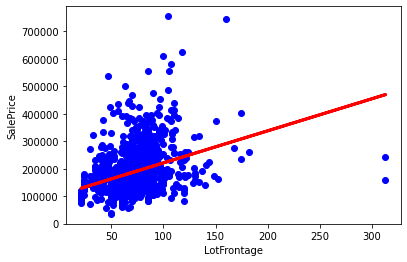

In [ ]:
# Plot for LotFrontage sales vs SalePrice 
plt.scatter( X , y , color = 'blue') # original data shown as blue points
plt.plot(X , y_pred , color = 'red' , linewidth = 3) # Fitted model in red
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.show()

In [ ]:
# Read in the data
X = surprisehousing['LotArea'].values.reshape(-1,1)
y = surprisehousing['SalePrice']

In [ ]:
reg = LinearRegression() 
reg.fit(X,y)

LinearRegression()

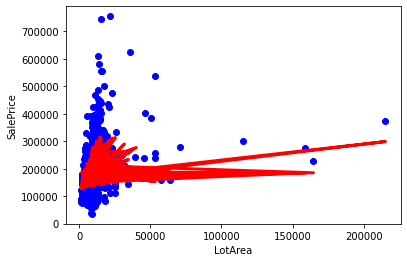

In [ ]:
# Plot for LotArea sales vs SalePrice 
plt.scatter( X , y , color = 'blue') # original data shown as blue points
plt.plot(X , y_pred , color = 'red' , linewidth = 3) # Fitted model in red
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

In [ ]:
# Read in the data
X = surprisehousing['OverallQual'].values.reshape(-1,1)
y = surprisehousing['SalePrice']
reg = LinearRegression() 
reg.fit(X,y)

LinearRegression()

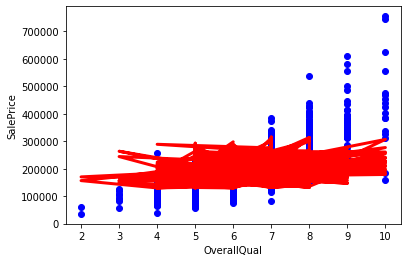

In [ ]:
# Plot for OverallQual sales vs SalePrice 
plt.scatter( X , y , color = 'blue') # original data shown as blue points
plt.plot(X , y_pred , color = 'red' , linewidth = 3) # Fitted model in red
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

In [ ]:
# Read in the data
X = surprisehousing['YearBuilt'].values.reshape(-1,1)
y = surprisehousing['SalePrice']
reg = LinearRegression() 
reg.fit(X,y)
plt.scatter( X , y , color = 'blue') # original data shown as blue points
plt.plot(X , y_pred , color = 'red' , linewidth = 3) # Fitted model in red
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

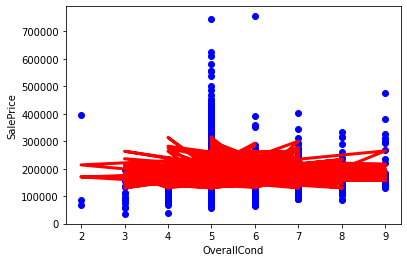

In [ ]:
# Plot for OverallCond sales vs SalePrice 
# Read in the data
X = surprisehousing['OverallCond'].values.reshape(-1,1)
y = surprisehousing['SalePrice']
plt.scatter( X , y , color = 'blue') # original data shown as blue points
plt.plot(X , y_pred , color = 'red' , linewidth = 3) # Fitted model in red
plt.xlabel("OverallCond")
plt.ylabel("SalePrice")
plt.show()

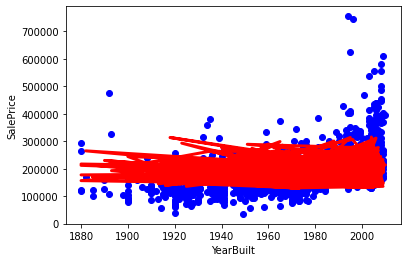

In [ ]:
# Plot for YearBuilt sales vs SalePrice 
# Read in the data
X = surprisehousing['YearBuilt'].values.reshape(-1,1)
y = surprisehousing['SalePrice']
plt.scatter( X , y , color = 'blue') # original data shown as blue points
plt.plot(X , y_pred , color = 'red' , linewidth = 3) # Fitted model in red
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show()

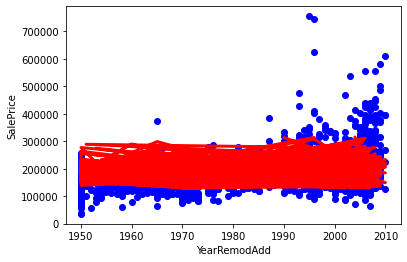

In [ ]:
# Plot for YearRemodAdd sales vs SalePrice 
# Read in the data
X = surprisehousing['YearRemodAdd'].values.reshape(-1,1)
y = surprisehousing['SalePrice']
plt.scatter( X , y , color = 'blue') # original data shown as blue points
plt.plot(X , y_pred , color = 'red' , linewidth = 3) # Fitted model in red
plt.xlabel("YearRemodAdd")
plt.ylabel("SalePrice")
plt.show()

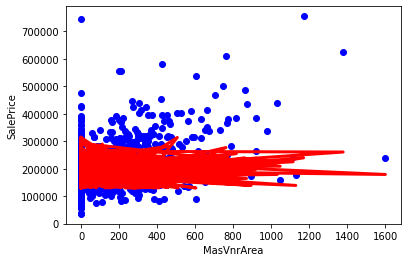

In [ ]:
# Plot for MasVnrArea sales vs SalePrice 
# Read in the data
X = surprisehousing['MasVnrArea'].values.reshape(-1,1)
y = surprisehousing['SalePrice']
plt.scatter( X , y , color = 'blue') # original data shown as blue points
plt.plot(X , y_pred , color = 'red' , linewidth = 3) # Fitted model in red
plt.xlabel("MasVnrArea")
plt.ylabel("SalePrice")
plt.show()

\Let us say that we want a better fit and hence we use higher degree polynomials as predictors. 

In [ ]:
#help(PolynomialFeatures)
X = surprisehousing['LotFrontage'].values.reshape(-1,1)
print(X)

[[65.]
 [80.]
 [68.]
 ...
 [66.]
 [68.]
 [75.]]


In [ ]:
poly = PolynomialFeatures(3) # Want to generate features with degree less than or equal to
                             # the specified degree
Y = poly.fit_transform(X) # Transform the variable X to 1, X, X^2, X^3
print(Y)

[[1.00000e+00 6.50000e+01 4.22500e+03 2.74625e+05]
 [1.00000e+00 8.00000e+01 6.40000e+03 5.12000e+05]
 [1.00000e+00 6.80000e+01 4.62400e+03 3.14432e+05]
 ...
 [1.00000e+00 6.60000e+01 4.35600e+03 2.87496e+05]
 [1.00000e+00 6.80000e+01 4.62400e+03 3.14432e+05]
 [1.00000e+00 7.50000e+01 5.62500e+03 4.21875e+05]]


In [ ]:
# Building the polynomial regression model with degree 5
degree=5 # got this number through trial and this is the lowest value which fit the data perfectly
polyreg5 = PolynomialFeatures(degree)
X_poly5 = polyreg5.fit_transform(X) # Transform the variable X to 1, X, X^2, X^3, X^4, X^5
linreg5 = LinearRegression()
linreg5.fit(X_poly5, y)

LinearRegression()

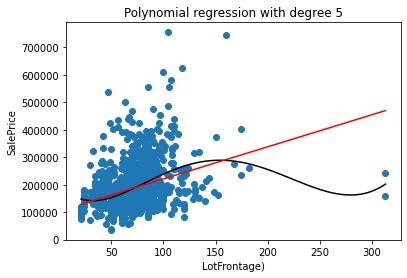

In [ ]:
# Plotting the polynomial regression(degree-5) and simple linear regression
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1) # Between 0 and 1 we get 300 equally spaced values
# print(X_seq)
plt.figure()
plt.scatter(X,y) 
plt.plot(X_seq,linreg5.predict(polyreg5.fit_transform(X_seq)),color="black") # model fit with polynomial regression
plt.plot(X_seq,reg.predict(X_seq),color="red") # model fit with linear regression
plt.title("Polynomial regression with degree "+str(degree))
plt.xlabel("LotFrontage)")
plt.ylabel("SalePrice")
plt.show()

In [ ]:
y_pred5 = linreg5.predict(polyreg5.fit_transform(X)) # store predictions from the polynomial regression in the variable y_pred5
print(r2_score(y, y_pred5))

0.13675581389025226


In [ ]:
# Metrics to assess model performance
rss = np.sum(np.square(y - y_pred5))
print(rss)
mse = mean_squared_error(y, y_pred5)
print(mse)
rmse = mse**0.5
# Root Mean Squared Error
print(rmse)

7187394908659.33
5371745073.73642
73292.18971852608


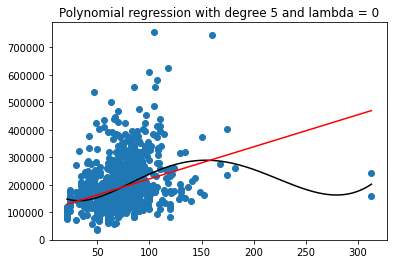

r2 score = 0.13675581389030045
[ 0.00000000e+00 -4.14228493e+03  8.77178538e+01 -5.37818764e-01
  1.20736101e-03 -7.96346260e-07]


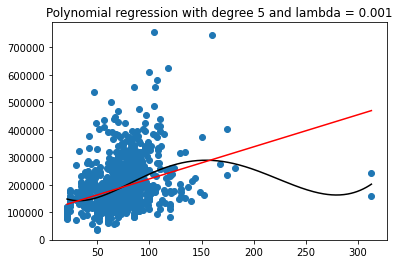

r2 score = 0.1367558138910192
[ 0.00000000e+00 -4.14228249e+03  8.77176517e+01 -5.37816249e-01
  1.20734982e-03 -7.96329467e-07]


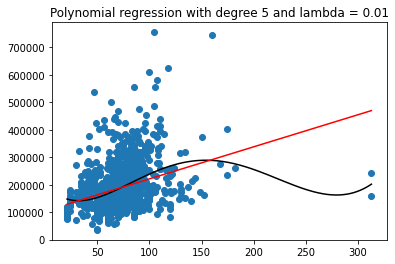

r2 score = 0.13675581389043956
[ 0.00000000e+00 -4.14217664e+03  8.77152812e+01 -5.37793112e-01
  1.20725118e-03 -7.96183683e-07]


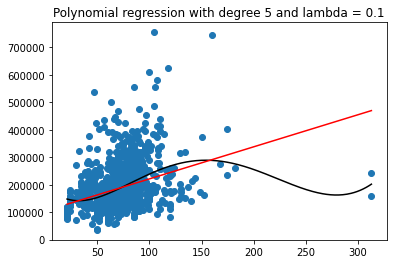

r2 score = 0.13675581383251756
[ 0.00000000e+00 -4.14111847e+03  8.76915831e+01 -5.37561805e-01
  1.20626509e-03 -7.94726252e-07]


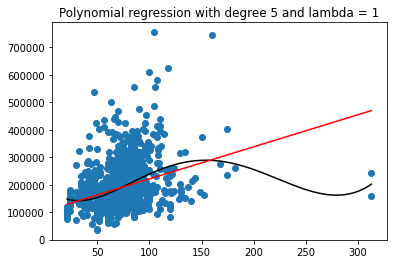

r2 score = 0.13675580807005427
[ 0.00000000e+00 -4.13056641e+03  8.74552663e+01 -5.35255215e-01
  1.19643174e-03 -7.80192796e-07]


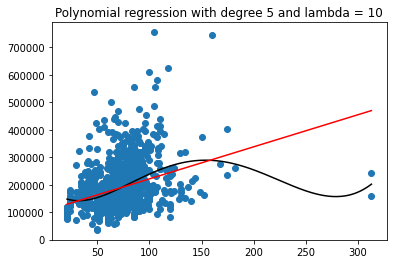

r2 score = 0.1367552603630804
[ 0.00000000e+00 -4.02793010e+03  8.51566920e+01 -5.12819796e-01
  1.10078610e-03 -6.38830755e-07]


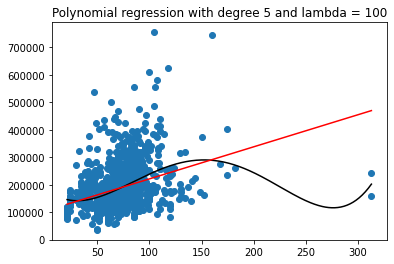

r2 score = 0.1367203021754123
[ 0.00000000e+00 -3.22627217e+03  6.72032984e+01 -3.37584277e-01
  3.53730196e-04  4.65300434e-07]


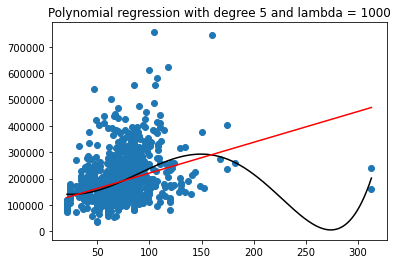

r2 score = 0.13635867625950848
[ 0.00000000e+00 -1.07898648e+03  1.91142207e+01  1.31792250e-01
 -1.64729160e-03  3.42276164e-06]


In [ ]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'

X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1) # values to be considered for predictor variable
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Higher the value of lambda, 
                                                  # more the regularization
for i in lambdas: # for each lambda we get different model coefficients
    degree = 5 # Degree for polynomial regression - chose 5 since this is the lowest number that gave a perfect fit
    # Creating degree 5 features
    ridgecoef = PolynomialFeatures(degree)
    # Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)    
    X_poly = ridgecoef.fit_transform(X)
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_poly, y) # fit the model on the polynomial features
    
    # Plotting the ridge regression model for each lambda
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq,ridgereg.predict(ridgecoef.fit_transform(X_seq)),color="black") # Polynomial Regression
    plt.plot(X_seq,reg.predict(X_seq),color="red") # Linear Regression
    plt.title("Polynomial regression with degree "+str(degree) + " and lambda = " + str(i))
    plt.show()
    
    #Computing the r2 score
    y_pred = ridgereg.predict(ridgecoef.fit_transform(X))
    print("r2 score = " + str(r2_score(y, y_pred))) 
    print(ridgereg.coef_) # model coefficients

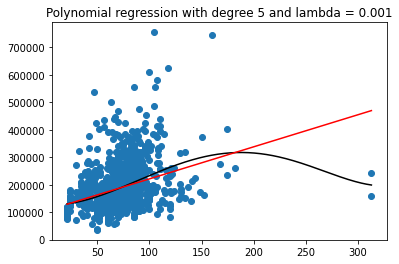

r2 score = 0.1339634209598205
[ 0.00000000e+00 -3.60700783e+02  2.26988344e+01 -8.50277502e-02
 -5.07217203e-05  3.50626223e-07]


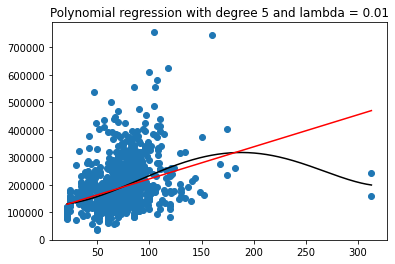

r2 score = 0.13396342126809013
[ 0.00000000e+00 -3.60700764e+02  2.26988365e+01 -8.50277703e-02
 -5.07216970e-05  3.50626285e-07]


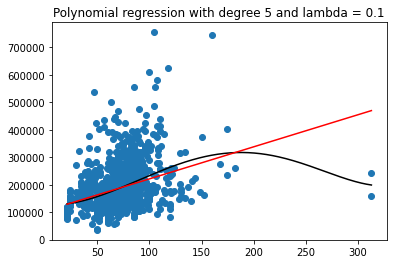

r2 score = 0.1339634243507528
[ 0.00000000e+00 -3.60700575e+02  2.26988576e+01 -8.50279711e-02
 -5.07214638e-05  3.50626905e-07]


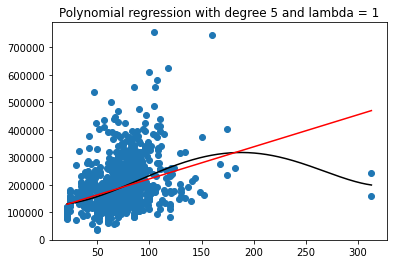

r2 score = 0.1339634551742015
[ 0.00000000e+00 -3.60698682e+02  2.26990683e+01 -8.50299794e-02
 -5.07191319e-05  3.50633107e-07]


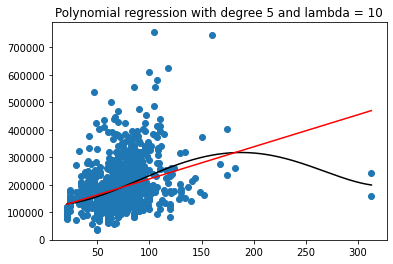

r2 score = 0.13396375819232575
[ 0.00000000e+00 -3.60677345e+02  2.27011398e+01 -8.50498889e-02
 -5.06959142e-05  3.50694602e-07]


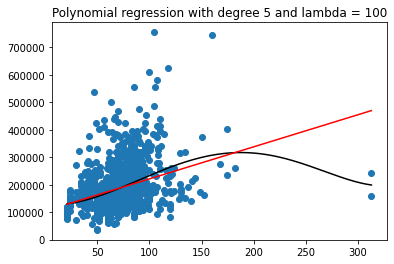

r2 score = 0.13396637058185168
[ 0.00000000e+00 -3.60273739e+02  2.27190708e+01 -8.52353777e-02
 -5.04717924e-05  3.51268631e-07]


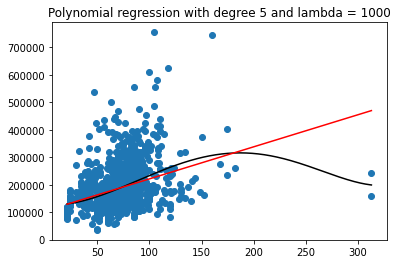

r2 score = 0.13395628606888077
[ 0.00000000e+00 -3.39912639e+02  2.26592522e+01 -8.59193123e-02
 -4.89380838e-05  3.53521692e-07]


In [ ]:
# Applying Lasso Regression with varying the hyperparameter 'lambda'

lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas:
    degree = 5
    # Creating degree 5 features
    lassocoef = PolynomialFeatures(degree)
    # Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)
    X_poly = lassocoef.fit_transform(X)
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_poly, y)
    # Plotting the ridge model
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq,lassoreg.predict(lassocoef.fit_transform(X_seq)),color="black")
    plt.plot(X_seq,reg.predict(X_seq),color="red")
    plt.title("Polynomial regression with degree "+str(degree) + " and lambda = " + str(i))
    plt.show()
    # Compute R^2 
    y_pred = lassoreg.predict(lassocoef.fit_transform(X))
    print("r2 score = " + str(r2_score(y, y_pred)))
    print(lassoreg.coef_)